<h1>Laboratory work nr. 2</h1>
<p>Scebec Mihai, IS-211M</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


ModuleNotFoundError: No module named 'seaborn'

<h3>1.	Load and print the first 20 observations of the dataset. Report if you see any unusual values.</h3>

In [ ]:
# 1.	Load and print the first 20 observations of the dataset. Report if you see any unusual values.
dataset = pd.read_csv('HousingData.csv')
# short notes for myself that describe the columns
# CRIM crime rate
# CHAS near bridge or not
# RM average room number
# AGE proportion of built houses somewhere before 1940
# DIS weighted mean to distances to 5 employment centres
# TAX property taxes per 10.000 dollars
# LSTAT somehow percentage of lower status people
# MEDV median value of home in 1000 dollars
dataset.head(20)

,CRIM,CHAS,RM,AGE,DIS,TAX,LSTAT,MEDV
0,0.00632,0.0,6.575,65.2,4.0900,296,4.98,24.0
1,0.02731,0.0,6.421,78.9,4.9671,242,9.14,21.6
2,0.02729,0.0,7.185,61.1,4.9671,242,4.03,34.7
3,0.03237,0.0,6.998,45.8,6.0622,222,2.94,33.4
4,0.06905,0.0,7.147,54.2,6.0622,222,NaN,36.2
5,0.02985,0.0,6.430,58.7,6.0622,222,5.21,28.7
6,0.08829,NaN,6.012,66.6,5.5605,311,12.43,22.9
7,0.14455,0.0,6.172,96.1,5.9505,311,19.15,27.1
8,0.21124,0.0,5.631,100.0,6.0821,311,29.93,16.5
9,0.17004,NaN,6.004,85.9,6.5921,311,17.10,18.9


Somehow I see places with very high crime rate but low lower status rate; crime == rich?

<h3>2.	Discuss what effects you would expect to see on the med home values (medv) for each variable.</h3>
    I expect to see more expensive homes with such conditions as: high room number, low criome rate, near the bridge. 
    Values like AGE and DIS seem subjective for me and I think they differ from case to case. Also I don't think taxes matter that much,  
    and sadly I suppose towns/homes with lower LSTAT value are more expensive because rich ones want to stick to other rich

<h3>3.	Compile the table with summary statistics (min, max, med, etc). Add the measure of skewness to this table. 
# Comment on the table and report briefly if you see anything unusual in the statistics of your variables.</h3>

In [ ]:
# 3.	Compile the table with summary statistics (min, max, med, etc). Add the measure of skewness to this table. 
# Comment on the table and report briefly if you see anything unusual in the statistics of your variables.
described_dataset = dataset.describe()
# described_dataset.loc['median'] = dataset.median() - 50 percentile is just our median
described_dataset.loc['skewness'] = dataset.skew()
described_dataset



,CRIM,CHAS,RM,AGE,DIS,TAX,LSTAT,MEDV
count,486.000000,486.000000,506.000000,486.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,0.069959,6.284634,68.518519,3.795043,408.237154,12.715432,22.532806
std,8.720192,0.255340,0.702617,27.999513,2.105710,168.537116,7.155871,9.197104
min,0.006320,0.000000,3.561000,2.900000,1.129600,187.000000,1.730000,5.000000
25%,0.081900,0.000000,5.885500,45.175000,2.100175,279.000000,7.125000,17.025000
50%,0.253715,0.000000,6.208500,76.800000,3.207450,330.000000,11.430000,21.200000
75%,3.560263,0.000000,6.623500,93.975000,5.188425,666.000000,16.955000,25.000000
max,88.976200,1.000000,8.780000,100.000000,12.126500,711.000000,37.970000,50.000000
skewness,5.212843,3.382293,0.403612,-0.582470,1.011781,0.669956,0.908892,1.108098


*  In general crime rate is about 0.2, but there are maxed places with 88 which looks way too much, must be an outlier; did it
   affect the std this much?
* Most of the houses are not near the bridge
* Most common room number is 6, nothing special. Maybe only the one with 8.78 is as expensive as the others, I thought it would cost more
* Most of the house percentage is built before 1940, therefore I don't think the price relies on this metric
* Distance to employment centres is about 3 in average, so 12 should feel like a real outcast and price would be corresponding.
* So far no idea how taxes would differ based on other parameters, maybe being close to bridge causes some additional water repair 
  related costs
* Originally I had an idea that the bigger the house, more the price. Then that it differs from position. This seems to be true

<h3>4.	Check the types of your data. Change the types as appropriate (if any categorical variable present change its type to category).</h3>

In [ ]:
# 4.	Check the types of your data. Change the types as appropriate (if any categorical variable present change its type to category).
print(dataset.dtypes)
dataset['CHAS'] = dataset['CHAS'].astype('category')
print(dataset.dtypes)
print(dataset)

CRIM     float64
CHAS     float64
RM       float64
AGE      float64
DIS      float64
TAX        int64
LSTAT    float64
MEDV     float64
dtype: object
CRIM      float64
CHAS     category
RM        float64
AGE       float64
DIS       float64
TAX         int64
LSTAT     float64
MEDV      float64
dtype: object
        CRIM CHAS     RM   AGE     DIS  TAX  LSTAT  MEDV
0    0.00632  0.0  6.575  65.2  4.0900  296   4.98  24.0
1    0.02731  0.0  6.421  78.9  4.9671  242   9.14  21.6
2    0.02729  0.0  7.185  61.1  4.9671  242   4.03  34.7
3    0.03237  0.0  6.998  45.8  6.0622  222   2.94  33.4
4    0.06905  0.0  7.147  54.2  6.0622  222    NaN  36.2
..       ...  ...    ...   ...     ...  ...    ...   ...
501  0.06263  0.0  6.593  69.1  2.4786  273    NaN  22.4
502  0.04527  0.0  6.120  76.7  2.2875  273   9.08  20.6
503  0.06076  0.0  6.976  91.0  2.1675  273   5.64  23.9
504  0.10959  0.0  6.794  89.3  2.3889  273   6.48  22.0
505  0.04741  0.0  6.030   NaN  2.5050  273   7.88  11.9

[506 ro

<h3>5.	Substitute the NaN values with appropriate measures of central tendency 
(mean, median, or mode – for the categorical variable – if you can’t change to mode, 
then check what is the most frequent value of that variable (you can use value_counts) and change it to the most frequent value).
 You may want to do this procedure for all variables to make sure that you did not miss a variable because you were not able to see 
that the variable contains NaNs while inspecting the table.</h3>

In [ ]:
# 5.	Substitute the NaN values with appropriate measures of central tendency 
# (mean, median, or mode – for the categorical variable – if you can’t change to mode, 
# then check what is the most frequent value of that variable (you can use value_counts) and change it to the most frequent value).
#  You may want to do this procedure for all variables to make sure that you did not miss a variable because you were not able to see 
# that the variable contains NaNs while inspecting the table. 
loc_mean = 0
loc_median = 0
for column in dataset:
    for value in dataset[column].values:
        if math.isnan(value):
            if dataset[column].dtype == 'float64':
                loc_mean = dataset[column].mean()
                loc_median = dataset[column].median()
                loc_skew = dataset[column].skew()
                if 1 > loc_skew > -1:
                    dataset[column] = dataset[column].fillna(loc_mean)
                    break
                else:
                    dataset[column] = dataset[column].fillna(loc_median)
                    break
            else:
                dataset[column] = dataset[column].fillna(dataset[column].mode())
                break

<h3>6.	Produce the histograms of all variables (except Chas) and comment on their distributions (for each variable separately). 
Notice any outliers, or fat tails (like in the case of tax). Put this into context knowing what your variables mean. 
So don’t just say that tax has a fat right tail, but something like 
“it appears that our dataset has the majority of houses with relatively low tax rates, and a set of properties that are highly taxed.”</h3>

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

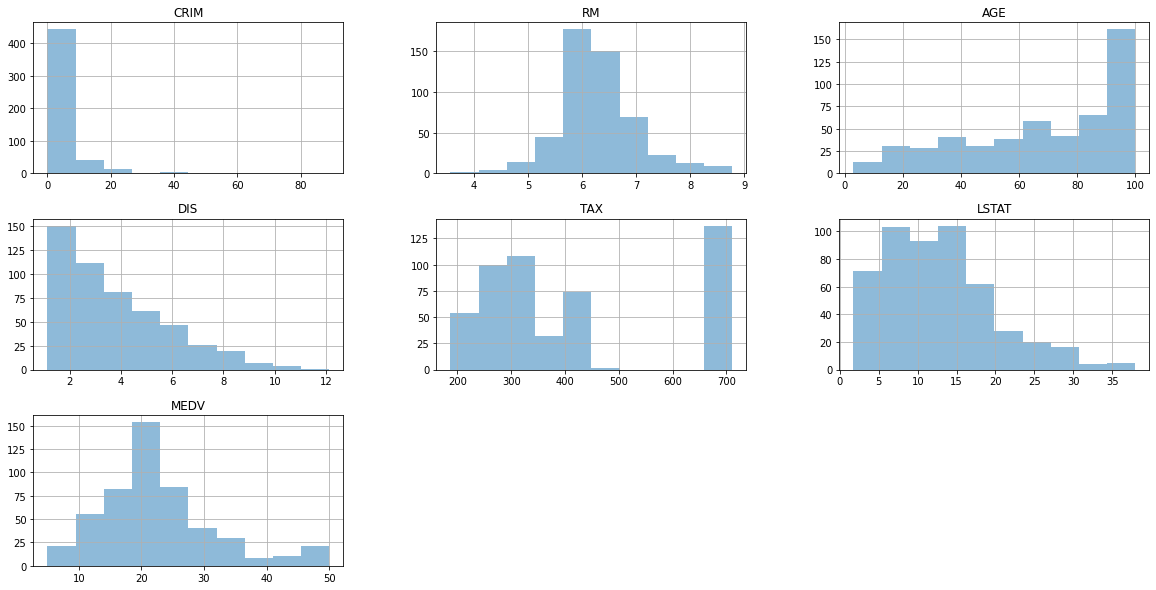

In [ ]:
# 6.	Produce the histograms of all variables (except Chas) and comment on their distributions (for each variable separately). 
# Notice any outliers, or fat tails (like in the case of tax). Put this into context knowing what your variables mean. 
# So don’t just say that tax has a fat right tail, but something like 
# “it appears that our dataset has the majority of houses with relatively low tax rates, and a set of properties that are highly taxed.”
dataset.hist(alpha=0.5, figsize=(20, 10), bins=10)
# it did not create hist for CHAS itself, I'm fine with it

* Crime rate is about 0 for the biggest part of the dataset, so this doesn't seem to be a concern in the city. But there are outliers at rate
  of 40 and I rememeber the max number here was around 88, so in some very narrow places it is a huge problem that might impact only 
  on the prices/taxed of those small places, not all the places

* Room number is 6 on average, it was also noticable from previous info. There are relatively many outliers both in 4-5 and 8-9 sides tho

* Can I really speak about outliers in case of age? Big part is older than 150 years? It should be a proportion, then they are 150% more 
  aged than 1940 which makes even less sense. But let's sey third part (~160) of them is respectively old and then the other proportions seem
  pretty evenly ditrsibuted, being 25-50 units with a very small portion of 'new' houses (10). There is a thought that age is related to 
  being closer to the centre of the city, therefore DIS, but I can't tell anything for now

* Again, for about 150 units distance to employment centres is pretty low, therefore they are closer to the centre of the city in general.
  Then the distance gradually increases as well as amount of houses with bigger distance. So, third part of houses sold is in the centre
  and the rest is farther or even on the outskirts. It probably means there should be deficit on houses in the centre (2/3 of people
  won't be able to have one no matter the price) so once again I think it will raise the price of the units. Or not necessarily the 
  price, but the taxes? I already see an abnormal amount of high tax rate houses

* So, taxes. I see the majority is from 200 to 450, and this might be taxes of the houses farther from the centre. And a very high tax rate
  for almost all houses in the centre of the city, their amount almost exactly corresponds to the amount of houses that are closest to the 
  employment centres. And if a point is closes to 5 different places in the city, it must be between them, therefore in the middle.

* Lower status population in percents. Almost in all towns it can vary from 2% to 20% which I will take as a norm. Then there is a fat tail
  from about 23% to 33%. These are not necessarily outliers, just the lower amount on the graph. And I honestly see no reason for these
  values to correlate with any others

* Medium value above all others looks more like a hat, a very high hat tho. With pretty big amount of units that don't belong to the hat.
  So I see that about 150 units cost a normal 20, also 150 cost anywhere from 15 to 27, other 75 units are distributed from 10 t0 37. 
  Small portion (~22) is also the cheapest and surprisingly about 35 units are from 40 to 50. Everything looks fine except for these 35
* This value does not seem to correspond to any other numbers here. BUT if you do the value counts of the CHAS column, it is 34 that is 
  almost what we see here. Therefore all the most expensive houses are probably from there, but I can't prove it from these histograms

In [ ]:
dataset.CHAS.value_counts()

0.0    452
1.0     34
Name: CHAS, dtype: int64

<h3>7.	Create box plots for all variables where you split by the Chas variable (make sure to adjust the number of axes).
 Comment shortly on each box plot separately noticing if the distributions are located higher for properties on the river
versus those not on the river. What does it mean when you put it into context with what your variables mean? Can you make
a guess if these houses are preferred by Bostoners? Are these high end residences? How do you explain that they seem to be
valued higher when it comes to price, but are in the same time on the older side when it comes to building’s age?</h3>

C:\Users\otaku\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


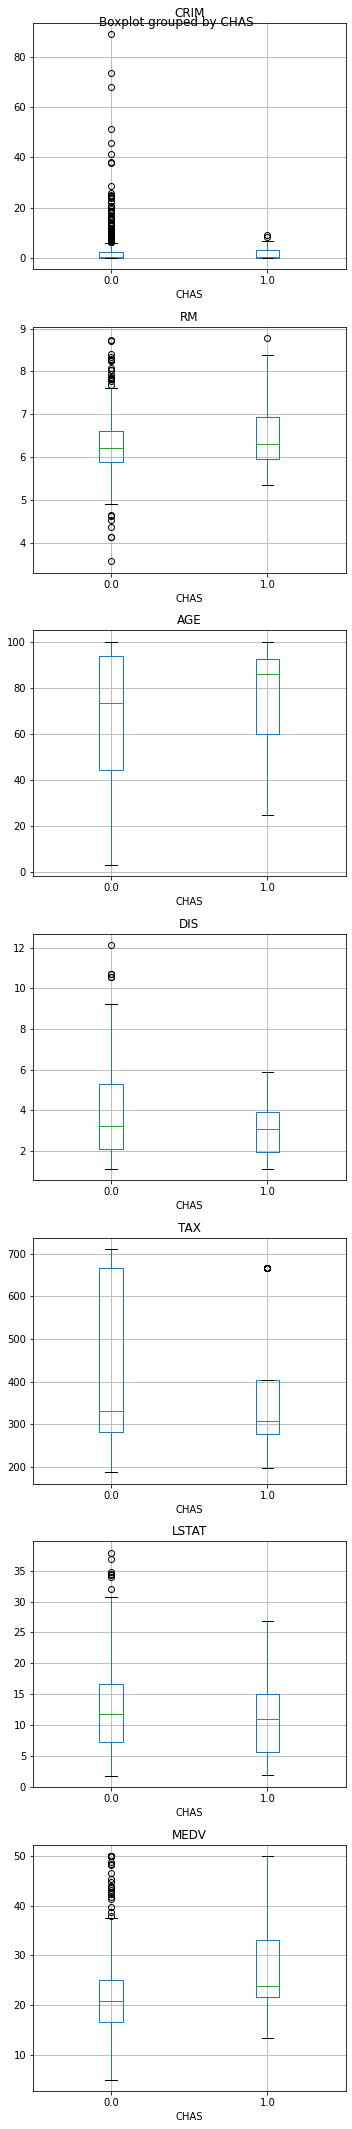

In [ ]:
# 7.	Create box plots for all variables where you split by the Chas variable (make sure to adjust the number of axes).
#  Comment shortly on each box plot separately noticing if the distributions are located higher for properties on the river
# versus those not on the river. What does it mean when you put it into context with what your variables mean? Can you make
# a guess if these houses are preferred by Bostoners? Are these high end residences? How do you explain that they seem to be
# valued higher when it comes to price, but are in the same time on the older side when it comes to building’s age?

fig, axs = plt.subplots(7, figsize=(5,  30), sharey=False)
dataset.boxplot(['CRIM',
                 'RM',
                 'AGE',
                 'DIS',
                 'TAX',
                 'LSTAT',
                 'MEDV'],
                'CHAS', axs)
plt.tight_layout()


* Crime rate in general looks exactly as low on the bridge as not on the bridge, but on the bridge there are way less outliers.

* I see that on the bridge there are slightly more rooms on the average than in the other parts of the city. I make a suggestion that
  houses on the bridge are more expensive, better conditioned and older

* On the age boxplot I can see that yes, on the bridge there are pretty old houses, but so happens on the other land as well. Only that
  on the bridge there are fewer new houses. Well, bridge has size limits afterall, and I guess most of it was occupied earlier

* Thanks to the DIS boxplot I see that houses on the bridge are all closer to the centre, therefore bridge itself should be somewhere in the
  middle of the town. So once again this should be a pretty old place with older buildings

* Originally I thought that taxes on the bridge will be higher thanks to possible water damage, etc. Apparently, I was wrong. Except for 
  some outliers, houses on the bridge have below average tax rate. I don't really get why. Closer to the centre == closer to the water,
  electricity etc supply? It sounds silly. Older houses have lower taxes? How much of discrimination towards the fresh blood then.

* Houses on the bridge have less lower status people. I think this is so thanks to the high prices. And the proportion to the rest of the
  city is not that different. Just slightly lower rate with roughly the same average.

* And yes, the prices do rise for the houses on the bridge, just as I guessed in the previous excercise. I'd say here difference is very 
 noticable. These should be some houses that any person is happy and proud to live in for some reason. They must either be very nice or
 have the best view in the city.

<h3>8.	Create the scatter plots for each pair of variables. Comment on how the variables correlate with the medv variable. 
Do these correlations make sense? Explain why? </h3>

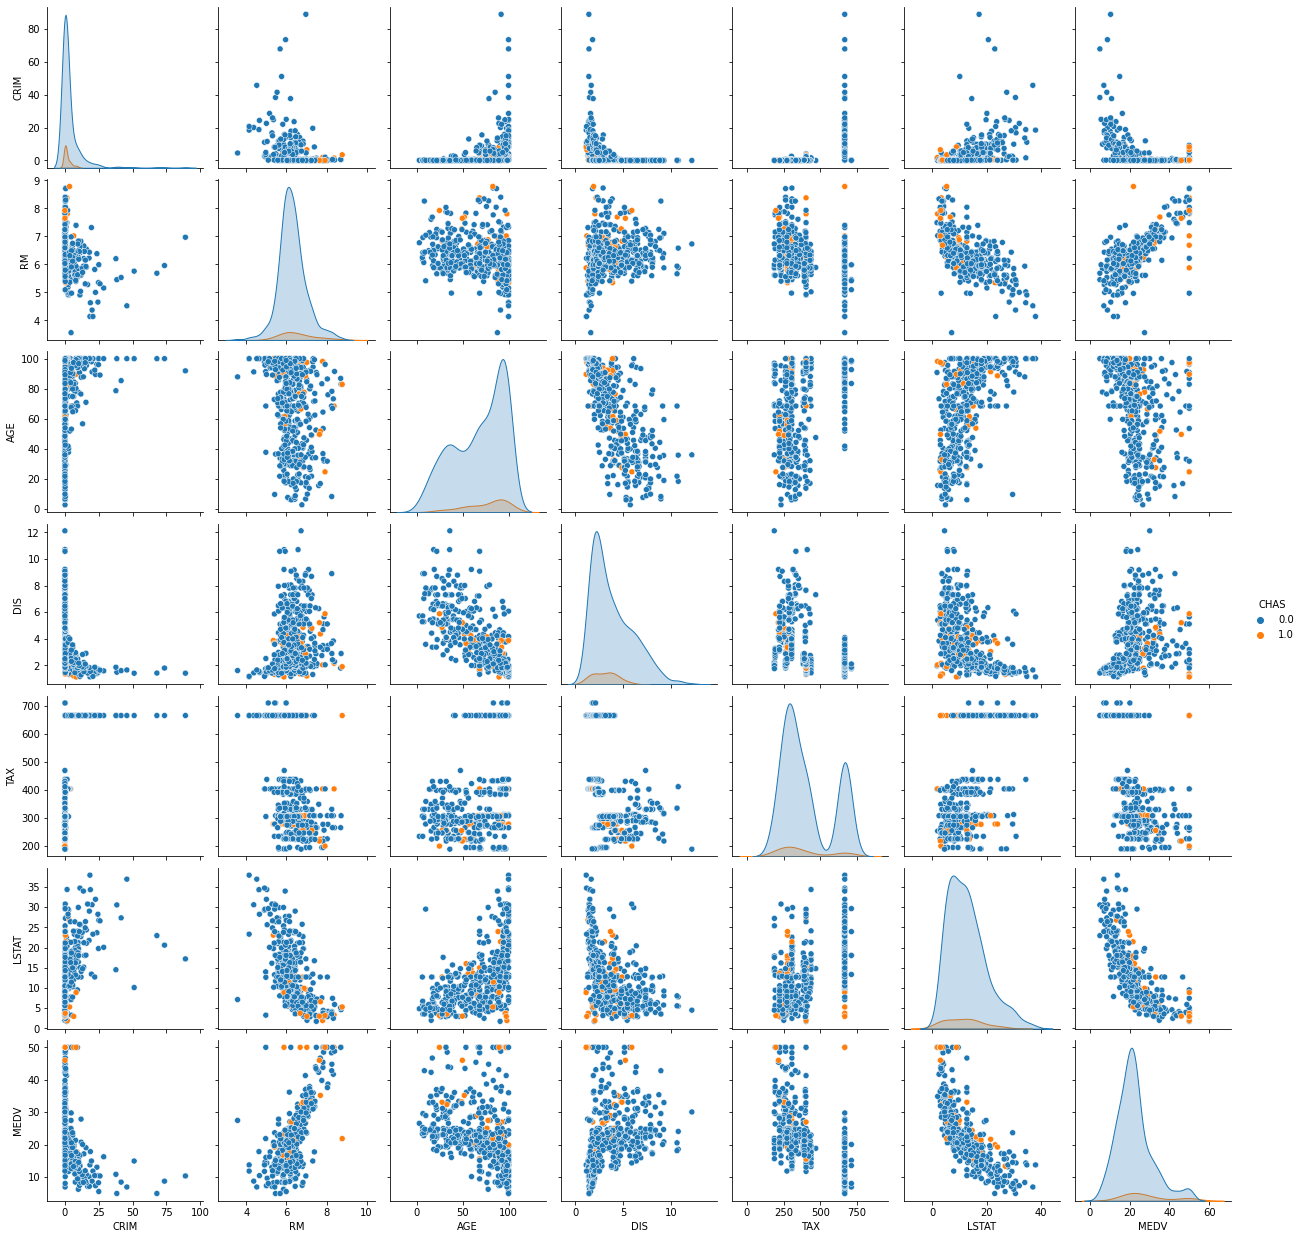

In [ ]:
# 8.	Create the scatter plots for each pair of variables. Comment on how the variables correlate with the medv variable. 
# Do these correlations make sense? Explain why? 
# sns.set_context('paper')
sns.pairplot(dataset, hue='CHAS')

* As crime rate decreases, I see a slight correlation with increasing house price. Correlation is small, but also using hue I noticed
  that many houses with low crime rate are on the bridge

* Pretty strong correlation with room number, which is obvious

* No correlation with age

* Possibly very slight correlation with distance to the centre, I actually expected more, given that more expensive houses are on the bridge 
  and are expensive

* No correlation with taxes

* Negative correlation with LSTAT, I didn't want to think that this exists, but egh

These observations confirmed that bridge and price are correlated, same about the room
number. Sadly I didn't want to think that LSTAT has impact too, and it does. The lower
LSTAT is, the higher the price is. Originally I thought it is about people nearby, not
necessarily in same level houses, but it appears the neighbourhood directly means
status and therefore price

<h3>9.	Create the heatmap and add the correlation coefficients to it. What are the 5 
strongest correlations that you see? Comment on their sign (only if not done so previously).</h3>

<AxesSubplot:>

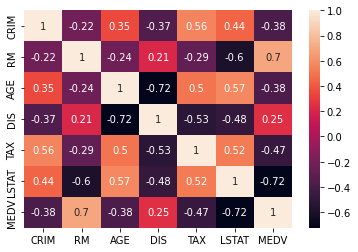

In [ ]:
# 9.	Create the heatmap and add the correlation coefficients to it. What are the 5 
# strongest correlations that you see? Comment on their sign (only if not done so previously). 

sns.heatmap(dataset.corr(), annot = True)

* First thing that draws my attention is correlation between age and distance. Houses that are closer to the centre are also older (centre is built earlier)
* Houses with high room number are pretty expensive, no need to explain that
* The lower LSTAT percentage is, the higher is the price; Is this because poor can't afford expensive houses?
* The lower LSTAT percentage is, the higher room number is. But it is more cuz of the price.
* And yet somehow the higher LSTAT percentage is, the older are houses. I can't really find an explanation. New wave smashed the old?  